# Sentiment Analysis on Movie Reviews using Natural Language Processing

Sentiment analysis is a natural language processing (NLP) problem where the text is understood and the underlying intent is predicted. In this notebook, I will use the IMDB movie reviews dataset to predict the sentiment of the review. The dataset consists of 50,000 reviews from IMDB where each one is labeled as positive or negative. The dataset is divided into 25,000 reviews for training and 25,000 reviews for testing. The sentiment analysis is done using tokenization, word embeddings, and LSTM neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
# get library for embedding and tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

import tensorflow_datasets as tfds

In [2]:
# get the data
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [3]:
# split the data into training and testing
train_data, test_data = imdb['train'], imdb['test']

In [4]:
# get the training and testing sentences and labels
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# convert the tensor data into numpy arrays
for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

print("Number of training sentences: ", len(training_sentences))
print("Number of testing sentences: ", len(testing_sentences))

# convert the labels into numpy arrays
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

# print the first review and label
print(training_sentences[0], "\n", training_labels[0])

Number of training sentences:  25000
Number of testing sentences:  25000
b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it." 
 0


In [5]:
# hyperparameters
vocab_size = 5000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [6]:
# tokenize the sentences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# convert the sentences into sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# convert the training and testing padded sequences into numpy arrays
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)

In [7]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    Embedding(vocab_size, embedding_dim),
    LSTM(16),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# train the model
num_epochs = 10
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final), verbose=2)

Epoch 1/10
782/782 - 33s - 42ms/step - accuracy: 0.7168 - loss: 0.5440 - val_accuracy: 0.7930 - val_loss: 0.4464
Epoch 2/10
782/782 - 27s - 35ms/step - accuracy: 0.8391 - loss: 0.3773 - val_accuracy: 0.8138 - val_loss: 0.4365
Epoch 3/10
782/782 - 29s - 37ms/step - accuracy: 0.8628 - loss: 0.3293 - val_accuracy: 0.8128 - val_loss: 0.4250
Epoch 4/10
782/782 - 26s - 34ms/step - accuracy: 0.8757 - loss: 0.2994 - val_accuracy: 0.8050 - val_loss: 0.4553
Epoch 5/10
782/782 - 27s - 34ms/step - accuracy: 0.8903 - loss: 0.2720 - val_accuracy: 0.8105 - val_loss: 0.4434
Epoch 6/10
782/782 - 27s - 34ms/step - accuracy: 0.8959 - loss: 0.2623 - val_accuracy: 0.7924 - val_loss: 0.4680
Epoch 7/10
782/782 - 27s - 34ms/step - accuracy: 0.9088 - loss: 0.2325 - val_accuracy: 0.8026 - val_loss: 0.5248
Epoch 8/10
782/782 - 28s - 35ms/step - accuracy: 0.8817 - loss: 0.2859 - val_accuracy: 0.7860 - val_loss: 0.5226
Epoch 9/10
782/782 - 27s - 35ms/step - accuracy: 0.9054 - loss: 0.2381 - val_accuracy: 0.8028 - 

Text(0.5, 1.0, 'Loss')

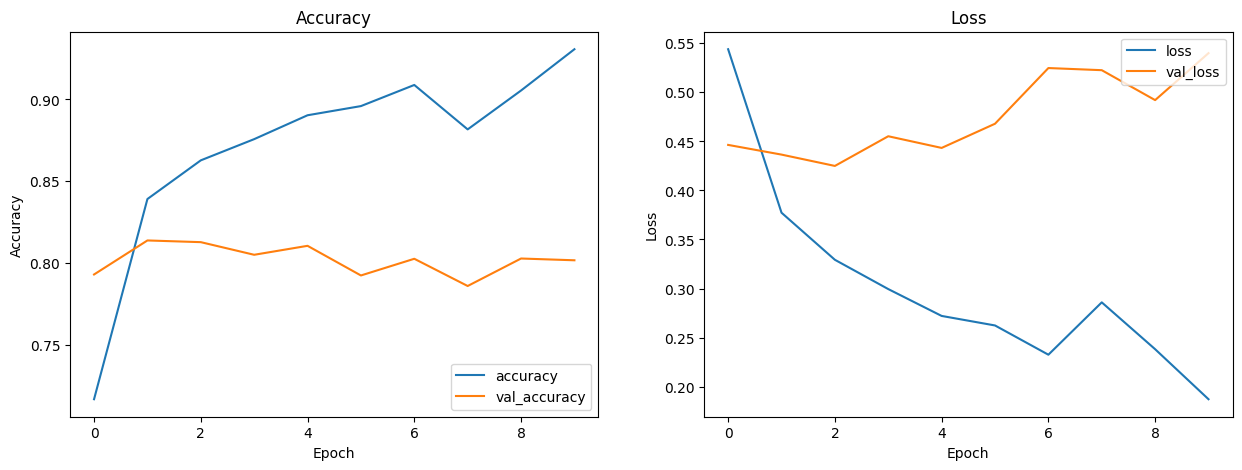

In [9]:
# plot the accuracy and loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')


In [10]:
# Test the model with new data

sentence = ["Directed by Anthony and Joe Russo, Avengers: Endgame masterfully concludes the Infinity Saga with a perfect blend of action, emotion, and nostalgia. The remaining Avengers embark on a time-travel mission to undo Thanos' snap, offering satisfying arcs for key characters. Robert Downey Jr. and Chris Evans deliver powerful performances, bringing closure to Iron Man and Captain America's journeys. The film's spectacular visuals and emotionally charged moments make it an unforgettable cinematic event, celebrating the heroes and legacy of the MCU.",
            "Tom Cruise returns as Ethan Hunt, facing his most dangerous mission yet. The action sequences are thrilling, and the stunts are jaw-dropping. The plot is engaging, with unexpected twists and turns. The supporting cast delivers solid performances, and the film's pacing keeps you on the edge of your seat. Overall, Mission: Impossible - Fallout is a pulse-pounding thrill ride that will leave you breathless.",
            "The visual effects in this movie are very weak. The acting is terrible, and the plot is predictable. The characters are one-dimensional, and the dialogue is cringeworthy. The soundtrack is forgettable, and the pacing is slow. Overall, this film is a complete waste of time and money.",
            "The movie was okay. The plot was interesting, but the pacing was slow. The acting was decent, but the characters were underdeveloped. The special effects were impressive, but the soundtrack was forgettable. Overall, it was a mediocre film that failed to leave a lasting impression."
            ]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# predict the sentiment of the sentences
for i in range(len(sentence)):
        print(sentence[i], "\nPositive" if model.predict(padded[i:i+1])[0][0] > 0.5 else "\nNegative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Directed by Anthony and Joe Russo, Avengers: Endgame masterfully concludes the Infinity Saga with a perfect blend of action, emotion, and nostalgia. The remaining Avengers embark on a time-travel mission to undo Thanos' snap, offering satisfying arcs for key characters. Robert Downey Jr. and Chris Evans deliver powerful performances, bringing closure to Iron Man and Captain America's journeys. The film's spectacular visuals and emotionally charged moments make it an unforgettable cinematic event, celebrating the heroes and legacy of the MCU. 
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Tom Cruise returns as Ethan Hunt, facing his most dangerous mission yet. The action sequences are thrilling, and the stunts are jaw-dropping. The plot is engaging, with unexpected twists and turns. The supporting cast delivers solid performances, and the film's pacing keeps you on the edge of your seat. Overall, Mission: Impossible - Fallout is a pulse-pounding t